# Calculating SHAP values

**ATTENTION:**

Notebook language: **Python**

## Loading model and data

In [1]:
import pickle5 as pickle

In [2]:
with open('./model/model.pickle', 'rb') as fp:
    model = pickle.load(fp) 

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_preprocessed = pd.read_csv('./data/shotdata2023_preprocessed.csv', index_col=0).reset_index(drop=True)
df_raw = pd.read_csv('./data/shotdata2023.csv', index_col=0).reset_index(drop=True)

In [5]:
X_preprocessed = df_preprocessed.drop('status', axis=1)

In [6]:
y_preprocessed = df_preprocessed.status

## AGGREGATED PROFILES

In [7]:
import dalex as dx

In [8]:
import matplotlib.pyplot as plt

In [9]:
players = ['Youssoufa Moukoko', 'Alejandro Garnacho', 'Mathys Tel', 'Jamie Bynoe-Gittens', 'Evan Ferguson']

In [10]:
explanations_distance = []
explanations_angle = []

In [11]:
distance_max = np.max(X_preprocessed.distanceToGoal)
distance_min = np.min(X_preprocessed.distanceToGoal)

angle_max = np.max(X_preprocessed.angleToGoal)
angle_min = np.min(X_preprocessed.angleToGoal)

In [12]:
for player in players:
    subset = df_raw[df_raw['player'] == player]
    X_subset = X_preprocessed.iloc[list(subset.index)]
    y_subset = y_preprocessed.iloc[list(subset.index)]
    
    explainer = dx.Explainer(model, X_subset, y_subset, verbose=0)
    
    subset_explanation = explainer.model_profile(type='partial', variables='distanceToGoal', label=player, 
                                                 variable_splits={'distanceToGoal': np.linspace(distance_min, distance_max, 101)})
    explanations_distance.append(subset_explanation)
    
    subset_explanation = explainer.model_profile(type='partial', variables='angleToGoal', label=player,
                                                 variable_splits={'angleToGoal': np.linspace(angle_min, angle_max, 101)})
    explanations_angle.append(subset_explanation)

/home2/faculty/astando/.local/lib/python3.8/site-packages/dalex/predict_explanations/_ceteris_paribus/checks.py:16: UserWarning: Variables taken from variables_splits
  warnings.warn("Variables taken from variables_splits")
Calculating ceteris paribus: 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]
/home2/faculty/astando/.local/lib/python3.8/site-packages/dalex/predict_explanations/_ceteris_paribus/checks.py:16: UserWarning: Variables taken from variables_splits
  warnings.warn("Variables taken from variables_splits")
Calculating ceteris paribus: 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]
/home2/faculty/astando/.local/lib/python3.8/site-packages/dalex/predict_explanations/_ceteris_paribus/checks.py:16: UserWarning: Variables taken from variables_splits
  warnings.warn("Variables taken from variables_splits")
Calculating ceteris paribus: 100%|██████████| 1/1 [00:05<00:00,  5.38s/it]
/home2/faculty/astando/.local/lib/python3.8/site-packages/dalex/predict_explanations/_ceteris_paribus/c

In [13]:
def extract_curves(obj):
    return [
        {
            'y': elem.result['_yhat_'],
            'x': elem.result['_x_']
        }
        for elem in obj
    ]

In [20]:
def plot(obj, labels):
    for i in range(len(obj)):
        plt.plot(obj[i]['x'], obj[i]['y'], label=labels[i], linewidth=4)

In [21]:
explanations_distance_curve = extract_curves(explanations_distance)
explanations_angle_curve = extract_curves(explanations_angle)

In [33]:
import seaborn as sns

In [34]:
sns.set_style("whitegrid")
plt.style.use('tableau-colorblind10')

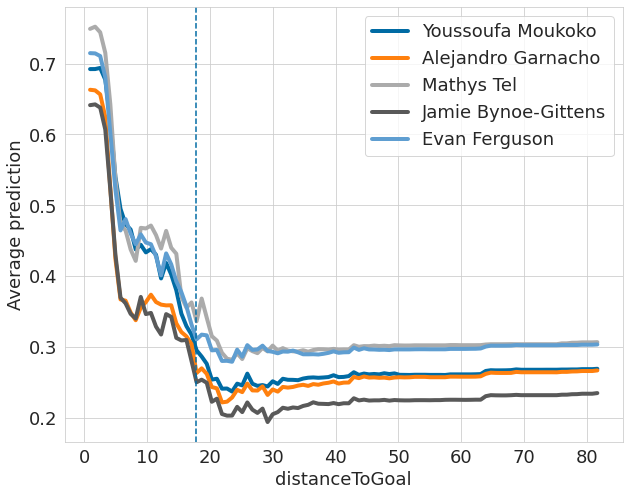

In [35]:
plt.subplots(figsize=(10, 8))
plot(explanations_distance_curve, players)
#plt.title('Aggregated profiles for the variable distanceToGoal', fontsize=22, weight='bold')
plt.ylabel('Average prediction', fontsize=18)
plt.xlabel('distanceToGoal', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

mean_value = np.mean(df_preprocessed.distanceToGoal)
plt.axvline(mean_value, linestyle='--')

plt.savefig('aggregated_profiles_distance.pdf')
plt.show()

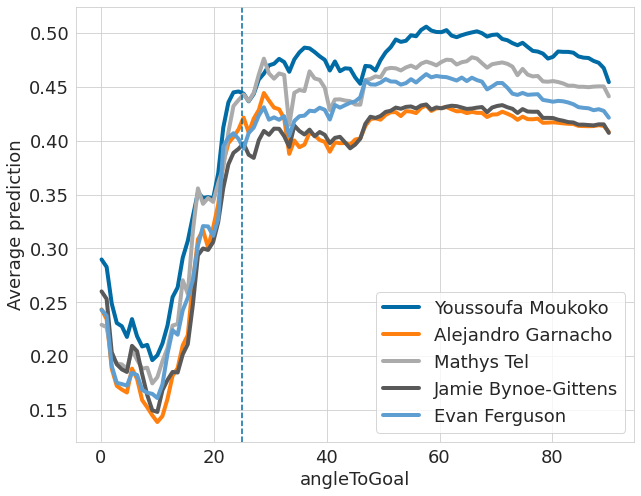

In [36]:
plt.subplots(figsize=(10, 8))
plot(explanations_angle_curve, players)
#plt.title('Aggregated profiles for the variable angleToGoal', fontsize=22, weight='bold')
plt.ylabel('Average prediction', fontsize=18)
plt.xlabel('angleToGoal', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

mean_value = np.mean(df_preprocessed.angleToGoal)
plt.axvline(mean_value, linestyle='--')

plt.savefig('aggregated_profiles_angle.pdf')
plt.show()

## GOALKEEPERS

In [39]:
explanations_h_a = []
explanations_shot_type = []
explanations_situation = []

In [40]:
goalkeepers_teams = ['Brentford', 'Espanyol', 'FC Cologne']
goalkeepers = ['David Raya', 'Alex Remino', 'Marvin Schwabe']

for goalkeeper_team, goalkeeper in zip(goalkeepers_teams, goalkeepers):
    subset = df_raw[np.logical_or(
        np.logical_and(
            df_raw['home_team'] == goalkeeper_team,
            df_raw['h_a'] == 'a'),
        np.logical_and(
            df_raw['away_team'] == goalkeeper_team,
            df_raw['h_a'] == 'h')
    )]
    subset = subset[
        np.isin(subset['result'], ["Goal", "SavedShot", "ShotOnPost"])
    ]


    X_subset = X_preprocessed.iloc[list(subset.index)]
    y_subset = y_preprocessed.iloc[list(subset.index)]

    explainer = dx.Explainer(model, X_subset, y_subset, verbose=0)

    subset_explanation = explainer.model_profile(type='partial', variables='h_a', label=goalkeeper, variable_type='categorical', grid_points=2)
    explanations_h_a.append(subset_explanation)

    subset_explanation = explainer.model_profile(type='partial', variables='shotType', label=goalkeeper, variable_type='categorical', grid_points=4)
    explanations_shot_type.append(subset_explanation)

    subset_explanation = explainer.model_profile(type='partial', variables='situation', label=goalkeeper, variable_type='categorical', grid_points=5)
    explanations_situation.append(subset_explanation)

Calculating ceteris paribus: 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]


In [41]:
explanations_h_a_curve = extract_curves(explanations_h_a)
explanations_shot_type_curve = extract_curves(explanations_shot_type)
explanations_situation_curve = extract_curves(explanations_situation)

In [42]:
def plot_categorical(obj, labels, ax=None):
    tmp = pd.DataFrame({
        'x': obj[0]['x'],
        labels[0]: obj[0]['y']
    })

    for i in range(1, len(obj)):
        tmp[labels[i]] = obj[i]['y']
    
    tmp.plot(x='x', kind='bar', legend=False, ax=ax)
    plt.xticks(rotation=0)

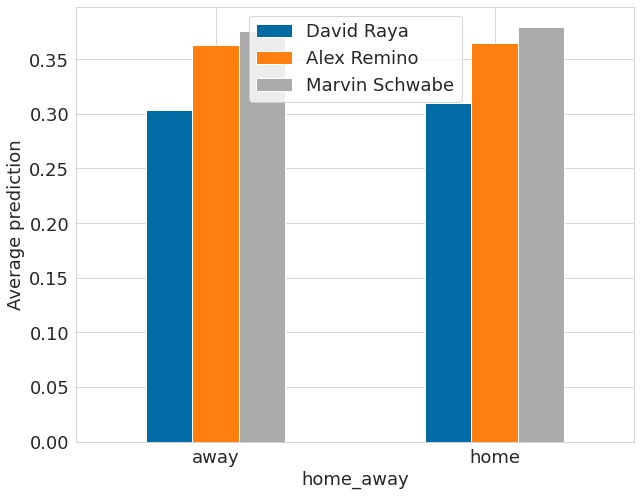

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
labels = ['away', 'home']
plot_categorical(explanations_h_a_curve, goalkeepers, ax)
plt.xticks(np.arange(len(labels)), labels)
#plt.title('Aggregated profiles for the variable home_away', fontsize=22, weight='bold')
plt.ylabel('Average prediction', fontsize=18)
plt.xlabel('home_away', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.savefig('aggregated_profiles_h_a.pdf')
plt.show()

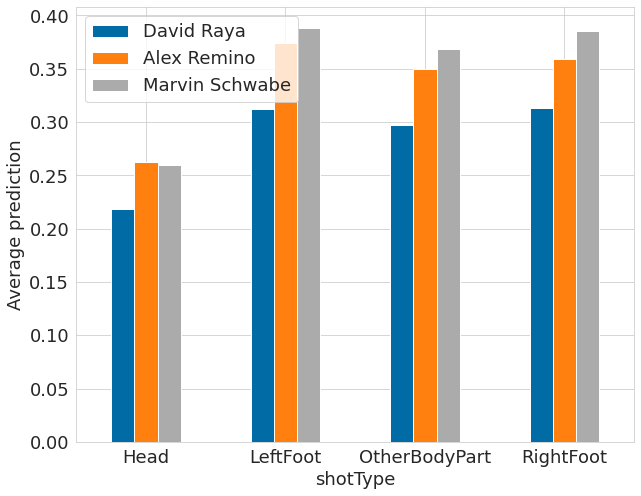

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
labels = ["Head", "LeftFoot", "OtherBodyPart", "RightFoot"]
plot_categorical(explanations_shot_type_curve, goalkeepers, ax)
plt.xticks(np.arange(len(labels)), labels)
#plt.title('Aggregated profiles for the variable shotType', fontsize=22, weight='bold')
plt.ylabel('Average prediction', fontsize=18)
plt.xlabel('shotType', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.savefig('aggregated_profiles_shot.pdf')
plt.show()

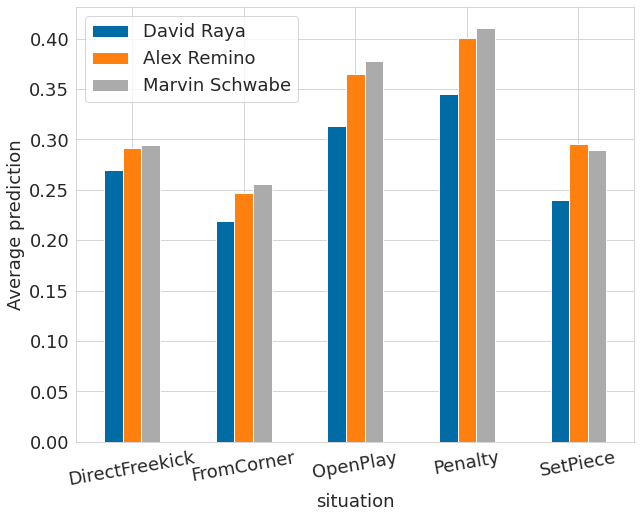

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))
labels = ["DirectFreekick", "FromCorner", "OpenPlay", "Penalty", "SetPiece"]
plot_categorical(explanations_situation_curve, goalkeepers, ax)
plt.xticks(np.arange(len(labels)), labels)
#plt.title('Aggregated profiles for the variable situation', fontsize=22, weight='bold')
plt.ylabel('Average prediction', fontsize=18)
plt.xlabel('situation', fontsize=18)
plt.xticks(fontsize=18, rotation=10)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.savefig('aggregated_profiles_situation.pdf')
plt.show()